In [2]:
# importing libraries
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
%matplotlib inline

In [143]:
# reading all the cleaned csv files
df1 = pd.read_csv("D:/KPMG virtual intership/Task1_DataQualityAssessment/CustomerDemographic_cleaned.csv")
df2 = pd.read_csv("D:/KPMG virtual intership/Task1_DataQualityAssessment/CustomerAddress_cleaned.csv")
df3 = pd.read_csv("D:/KPMG virtual intership/Task1_DataQualityAssessment/Transactions_cleaned.csv")
df4 = pd.read_csv("D:/KPMG virtual intership/Task1_DataQualityAssessment/NewCustomerList_cleaned.csv")

In [75]:
# merging all the files in the list based on customer id

df12 = pd.merge(df1, df2, on=["customer_id"], how="inner")
df123 = pd.merge(df12, df3, on=["customer_id"], how="inner")

In [76]:
# exporting the csv
df123.to_csv("D:/KPMG virtual intership/Task1_DataQualityAssessment/merged_data.csv", index=False, encoding='utf-8-sig')

In [77]:
# sorting the data by customer id
df = df123.sort_values(by = ["customer_id"])

In [78]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
10,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19964,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
19966,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
19962,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0
19963,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,19968.0,1740.254307,1009.819066,1.00,861.75,1739.50,2614.25,3500.00
past_3_years_bike_related_purchases,19968.0,48.757412,28.611359,0.00,24.00,48.00,73.00,99.00
tenure,19968.0,10.689052,5.611093,1.00,6.00,11.00,15.00,22.00
postcode,19968.0,2987.623347,851.306647,2000.00,2200.00,2767.00,3754.00,4883.00
property_valuation,19968.0,7.516376,2.824783,1.00,6.00,8.00,10.00,12.00
transaction_id,19968.0,9997.846504,5773.929973,1.00,4997.75,9996.50,14996.25,20000.00
product_id,19968.0,45.365986,30.750115,0.00,18.00,44.00,72.00,100.00
online_order,19968.0,0.501102,0.500011,0.00,0.00,1.00,1.00,1.00
list_price,19968.0,1107.780004,582.852548,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19794.0,556.082756,405.798188,7.21,215.14,507.58,795.10,1759.85


In [81]:
df.duplicated().sum()

0

In [82]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [83]:
df["last_name"].fillna(method = 'ffill', inplace=True)

In [84]:
df["dob"].fillna(method = 'ffill', inplace=True)

In [85]:
df["standard_cost"].mode()

0    388.92
dtype: float64

In [86]:
df["standard_cost"].mean()

556.0827558856358

In [87]:
df["standard_cost"].fillna(df["standard_cost"].mean(), inplace=True)

In [88]:
df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [89]:
df["dob"] = df["dob"].apply(pd.to_datetime)

In [91]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [92]:
ref_date = dt.datetime.now()
df["Age"] = df["dob"].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq="Y")))

In [94]:
df = df[df["Age"]<100]

In [96]:
df["transaction_month"] = pd.DatetimeIndex(df["dob"]).month

<ipython-input-96-f9813b48a14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transaction_month"] = pd.DatetimeIndex(df["dob"]).month


In [97]:
df['profit'] = df['list_price'] - df['standard_cost']

<ipython-input-97-a29e1634b747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] = df['list_price'] - df['standard_cost']


In [98]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,69,10,90.10
10,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,69,10,110.56
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,69,10,75.14
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,69,10,431.33
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,69,10,709.34


In [99]:
df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
19964,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,55,7,827.16
19966,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,Solex,Standard,medium,medium,71.49,53.62,41245.0,55,7,17.87
19962,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,55,7,198.22
19963,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,55,7,15.08
19967,3500,Josy,Fleeman,Female,71,1967-07-21,Operator,Entertainment,Affluent Customer,False,...,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,55,7,144.26


In [100]:
plt.rcParams["figure.figsize"] = [15, 8]

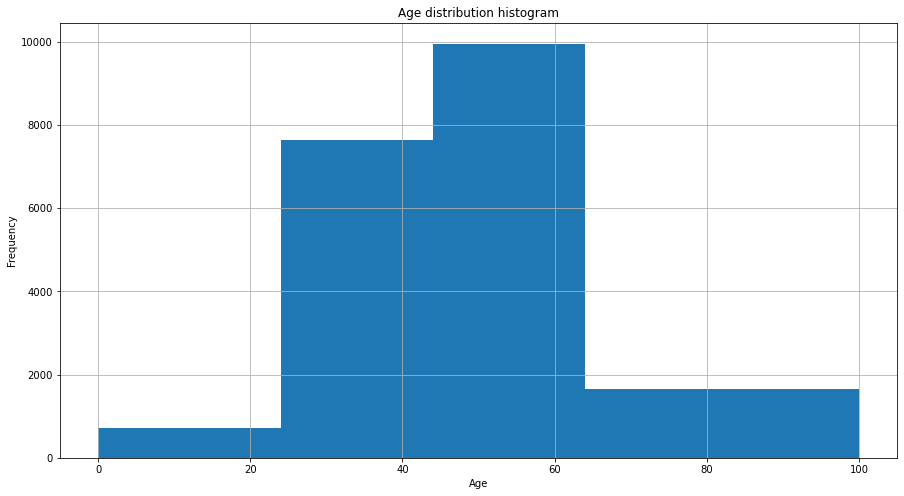

In [105]:
df["Age"].hist(bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender count barchart')

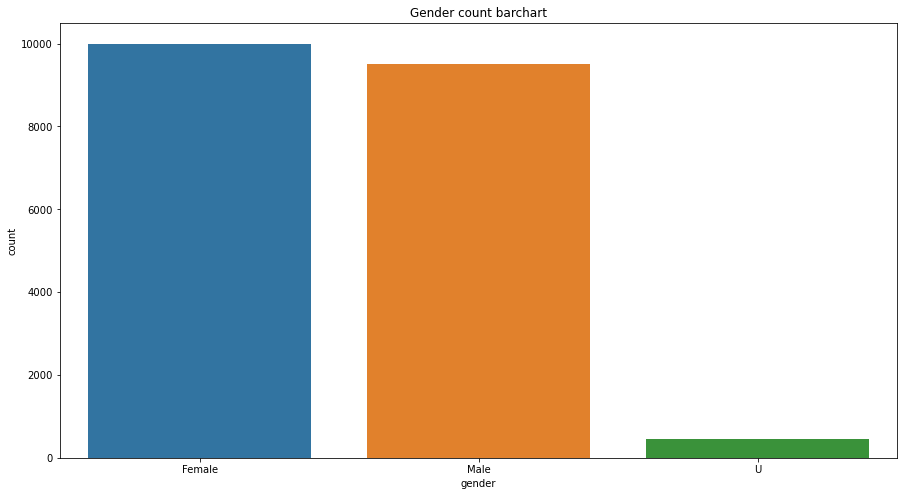

In [106]:
sns.countplot(df["gender"])
plt.title('Gender count barchart')


C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Job industry category barchart')

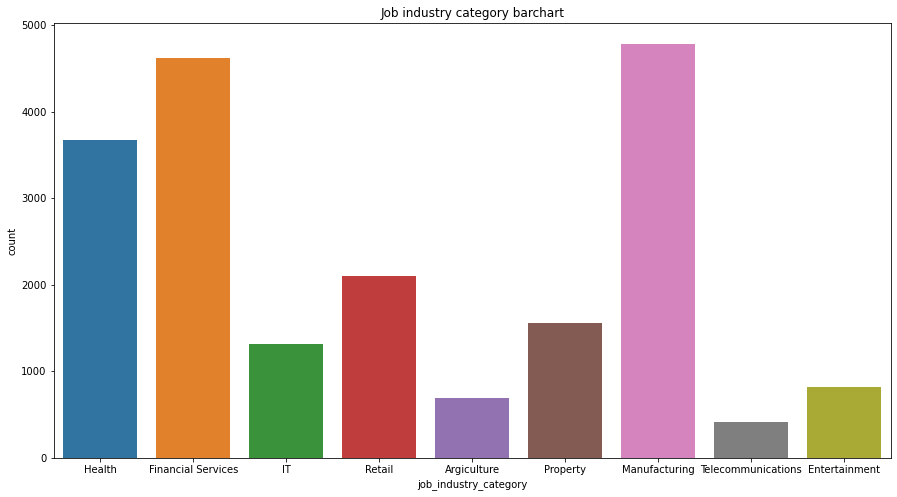

In [107]:
sns.countplot(df["job_industry_category"])
plt.title('Job industry category barchart')

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Job industry category across gender')

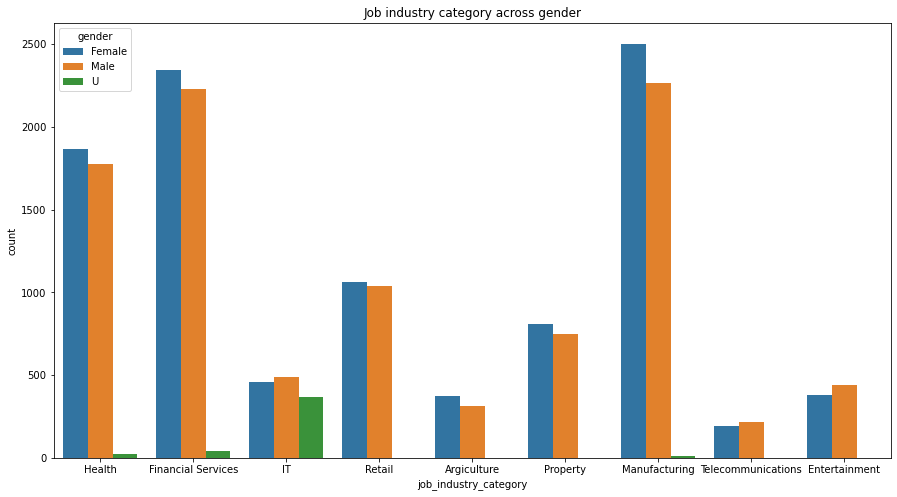

In [109]:
sns.countplot(df["job_industry_category"], hue = df["gender"])
plt.title('Job industry category across gender')

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

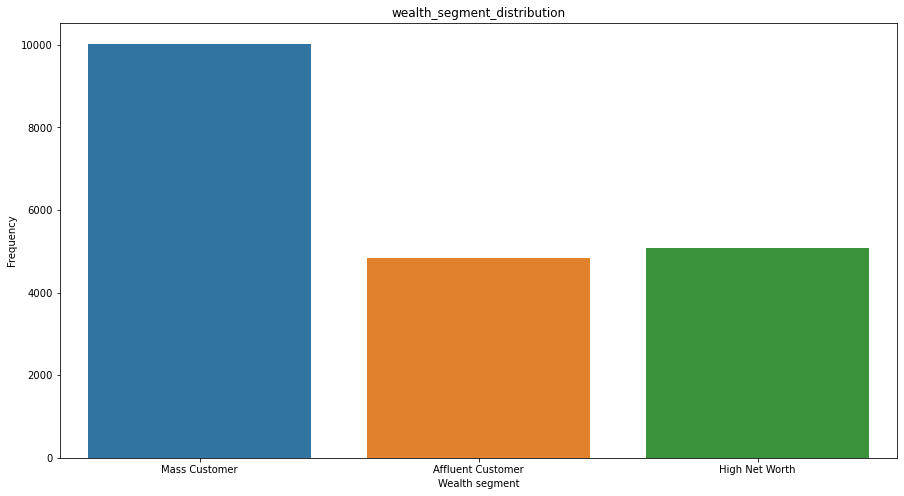

In [111]:
sns.countplot(df["wealth_segment"])
plt.title('wealth_segment_distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of cars owned across gender')

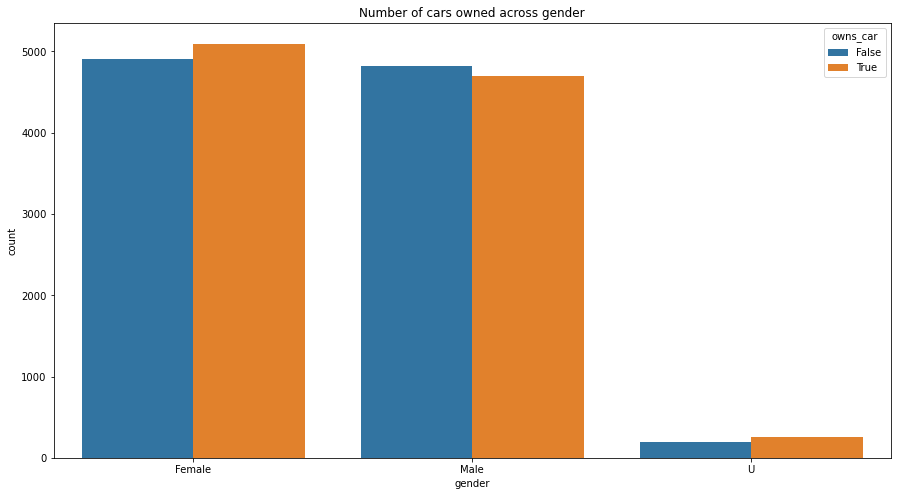

In [112]:
sns.countplot(df["gender"], hue=df["owns_car"])
plt.title("Number of cars owned across gender")

Text(0.5, 1.0, 'Number of bikes purchased across gender')

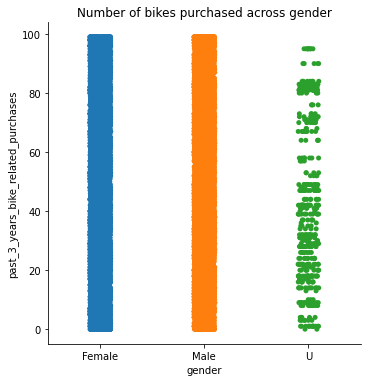

In [119]:
sns.catplot(data=df, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number of bikes purchased across gender')

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wealth segment across gender')

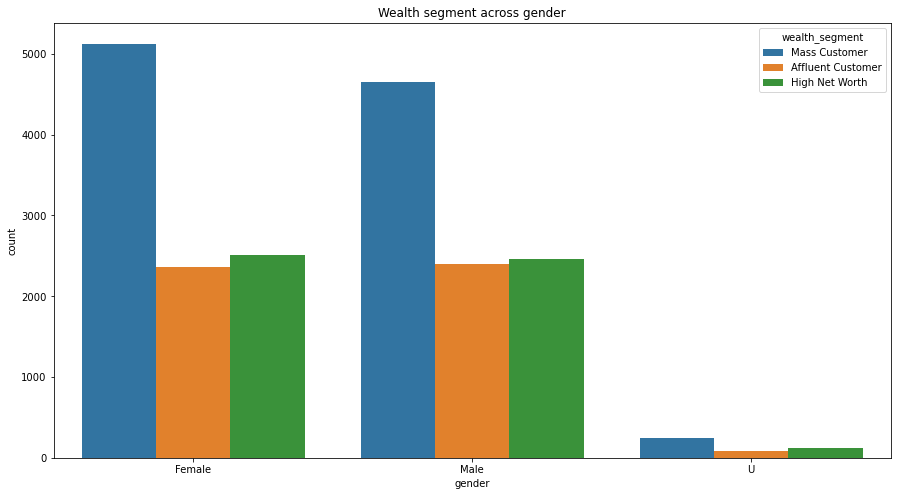

In [121]:
sns.countplot(df["gender"], hue=df["wealth_segment"])
plt.title("Wealth segment across gender")

Text(0.5, 1.0, 'Wealth Segment across age group')

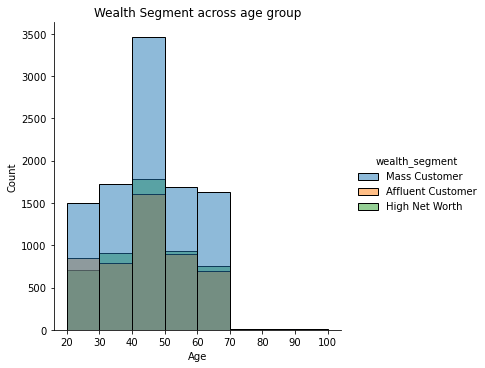

In [130]:
sns.displot(x='Age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')

In [134]:
df["state"].value_counts()

NSW    10685
VIC     5021
QLD     4253
Name: state, dtype: int64

In [133]:
df["state"].replace({"New South Wales": "NSW"}, inplace=True)

C:\Users\Shreya\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wealth segment across state')

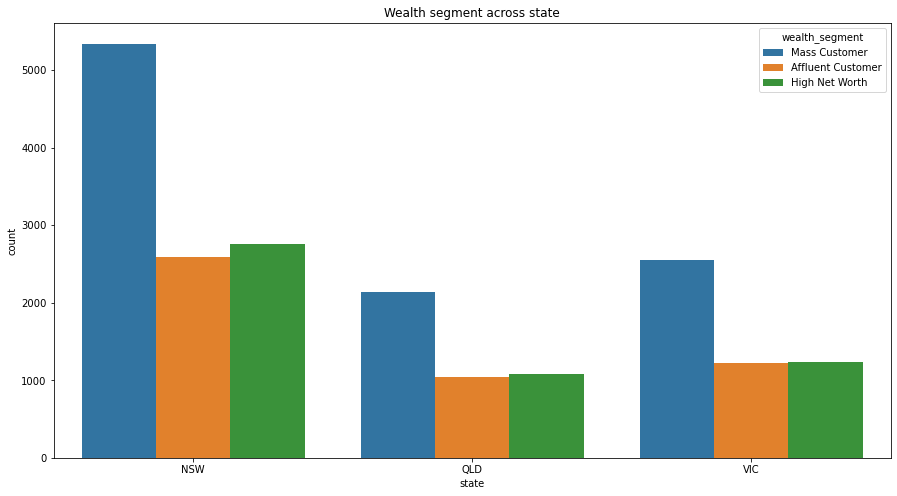

In [135]:
sns.countplot(df["state"], hue=df["wealth_segment"])
plt.title("Wealth segment across state")

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Job industry category across genderacross gender')

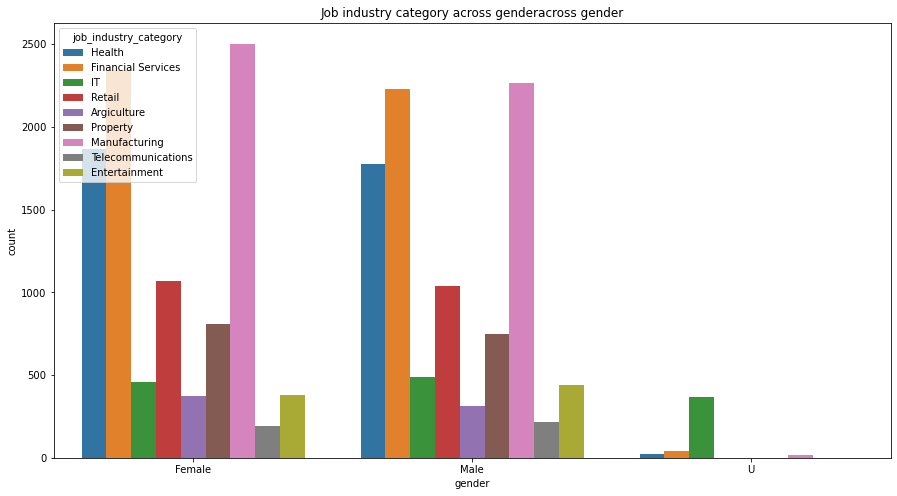

In [137]:
sns.countplot(df["gender"], hue=df["job_industry_category"], order = df["gender"].value_counts().index)
plt.title("Job industry category across genderacross gender")

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of people of different gender in different state')

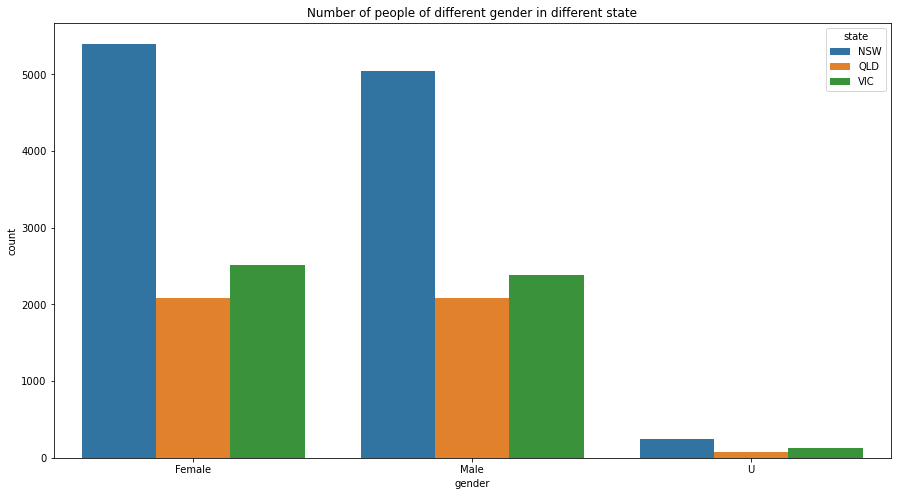

In [138]:
sns.countplot(df["gender"], hue=df["state"])
plt.title("Number of people of different gender in different state")

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of people in different state')

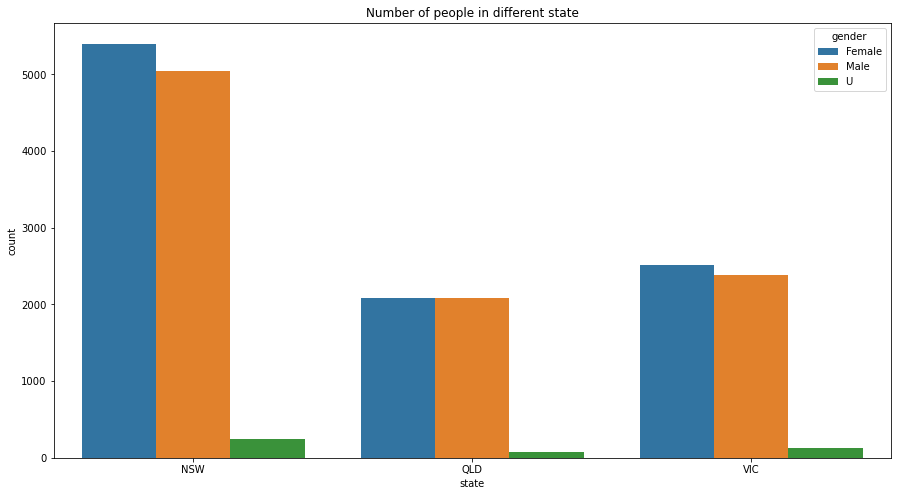

In [139]:
sns.countplot(df["state"], hue=df["gender"])
plt.title("Number of people in different state")

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of people who owns a car in different state')

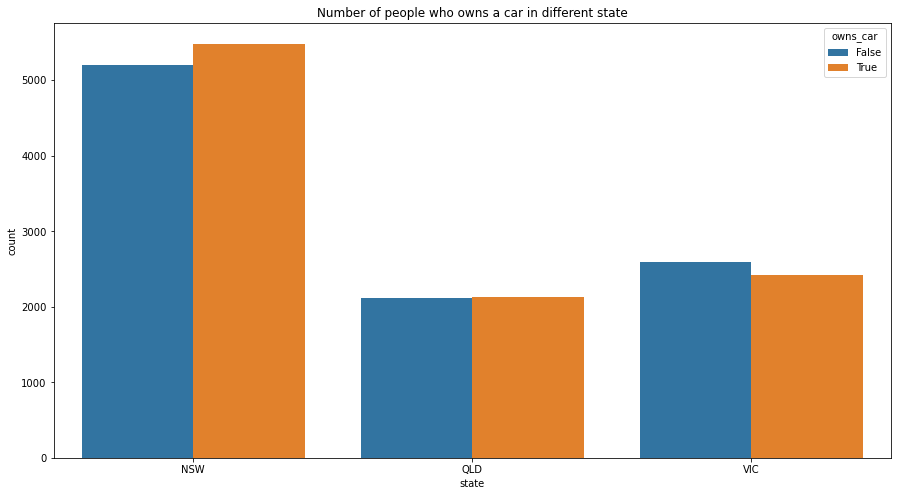

In [140]:
sns.countplot(df["state"], hue=df["owns_car"])
plt.title('Number of people who owns a car in different state')

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot showing the age range of customers')

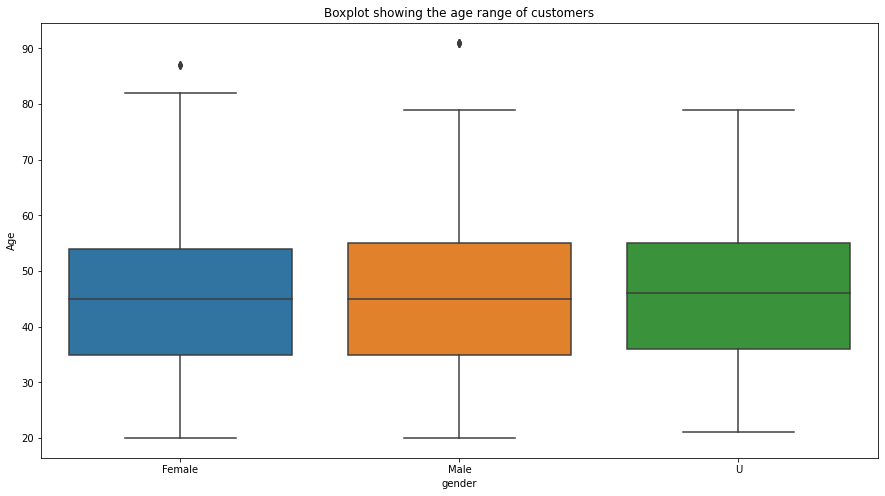

In [141]:
sns.boxplot(df["gender"], df["Age"])
plt.title('Boxplot showing the age range of customers')

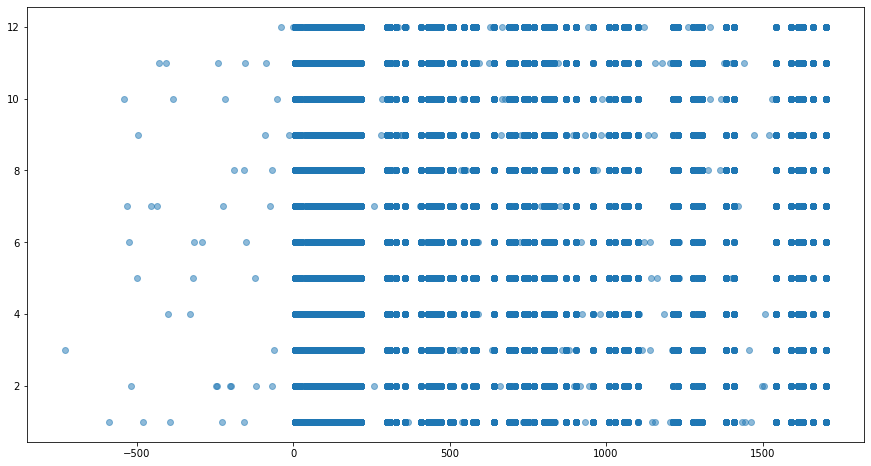

In [142]:
plt.scatter(df['profit'], df['transaction_month'], alpha=0.5)


In [144]:
df_newlist = df4

In [145]:
df_newlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  1000 non-null   object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [146]:
df_newlist

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [147]:
df_newlist.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,rank,value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [149]:
df_newlist.duplicated().sum()

0

In [150]:
df_newlist.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
rank                                   0
value                                  0
dtype: int64

In [151]:
df_newlist["new_id"] = df_newlist.index

In [152]:
df_newlist['dob'] = pd.to_datetime(df_newlist['dob'], errors='coerce')

In [153]:
df_newlist.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
rank                                            int64
value                                         float64
new_id                      

In [154]:
df_newlist['dob'] = df_newlist['dob'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [157]:
df_newlist['dob'].astype('datetime64')

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: dob, Length: 1000, dtype: datetime64[ns]

In [158]:
df_newlist['dob'] = df_newlist['dob'].fillna(df_newlist['dob'].mode())

In [159]:
ref_date2 = dt.datetime.now()
df_newlist['Age'] = df_newlist['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [160]:
df_newlist

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value,new_id,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,0,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1,52.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,2,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,3,43.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,4,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,995,63.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,996,21.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,997,68.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,998,70.0


In [162]:
df_newlist = df_newlist[df_newlist.Age < 100]

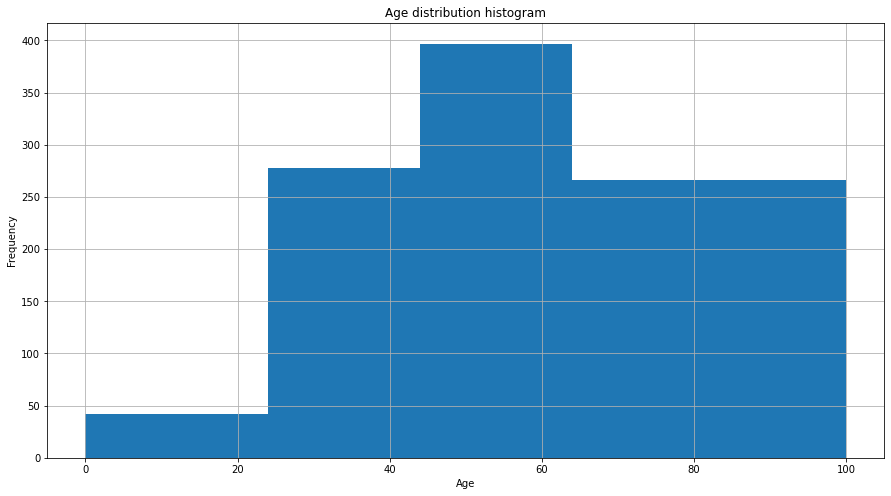

In [164]:
df_newlist["Age"].hist(bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

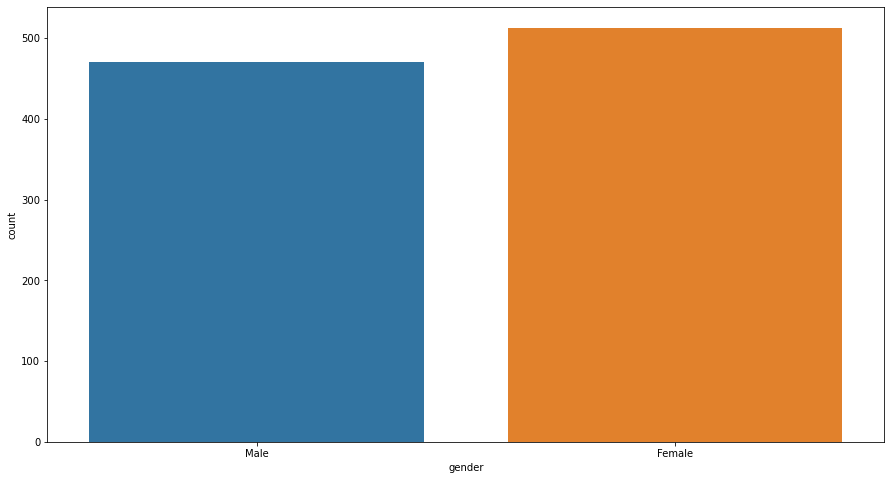

In [165]:
sns.countplot(df_newlist["gender"])

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

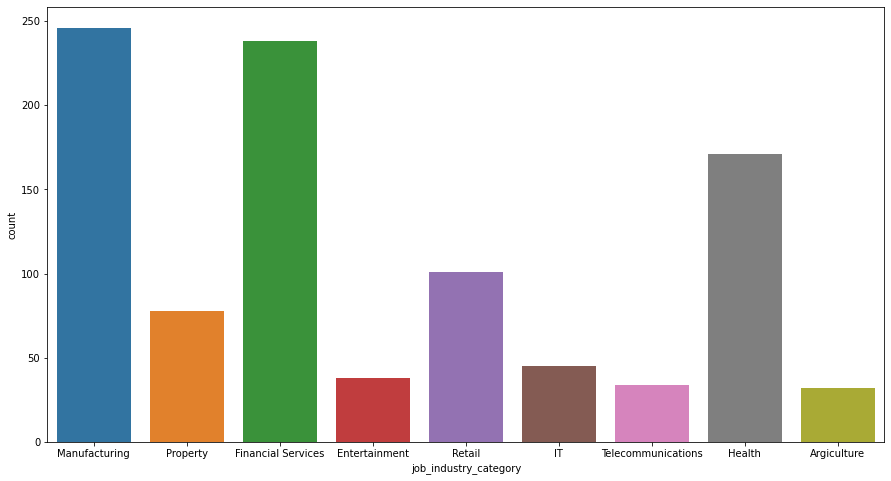

In [166]:
sns.countplot(df_newlist["job_industry_category"])

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

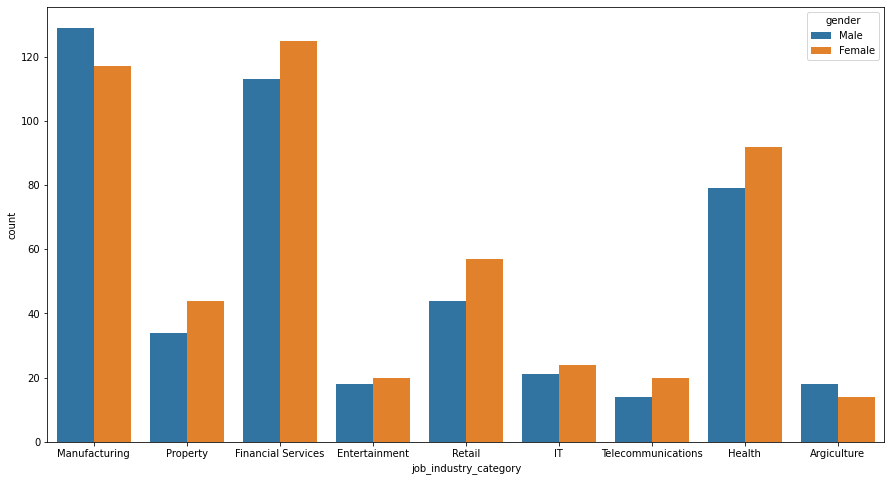

In [167]:
sns.countplot(df_newlist["job_industry_category"], hue =df_newlist["gender"] )

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

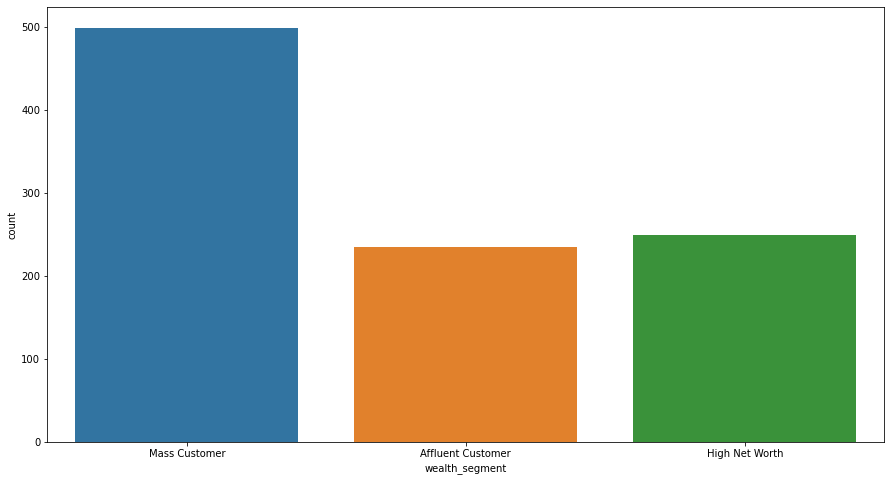

In [168]:
sns.countplot(df_newlist["wealth_segment"])

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

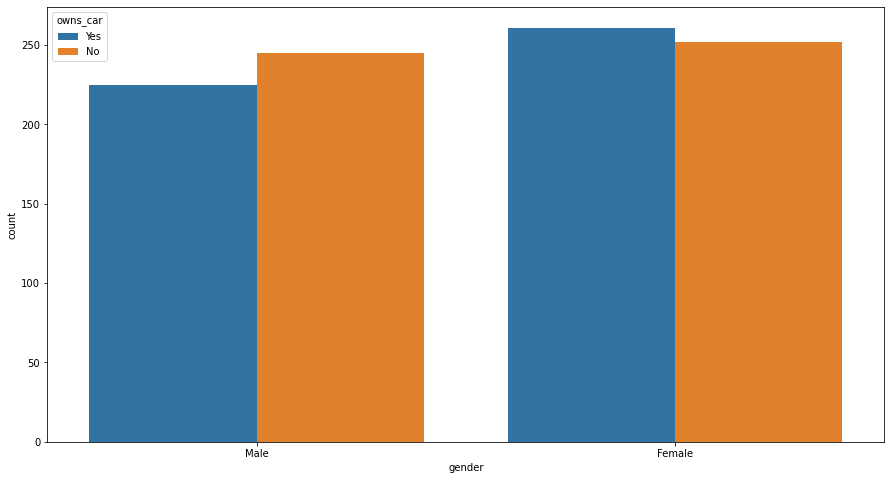

In [169]:
sns.countplot(df_newlist["gender"], hue =df_newlist["owns_car"] )

Text(0.5, 1.0, 'Number bike purchased across gender')

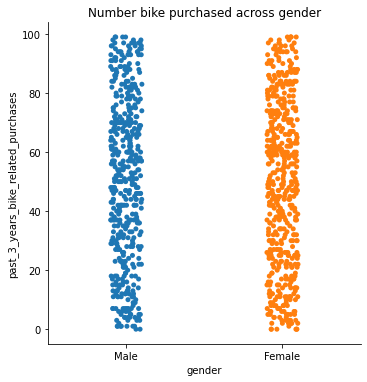

In [170]:
sns.catplot(data=df_newlist, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

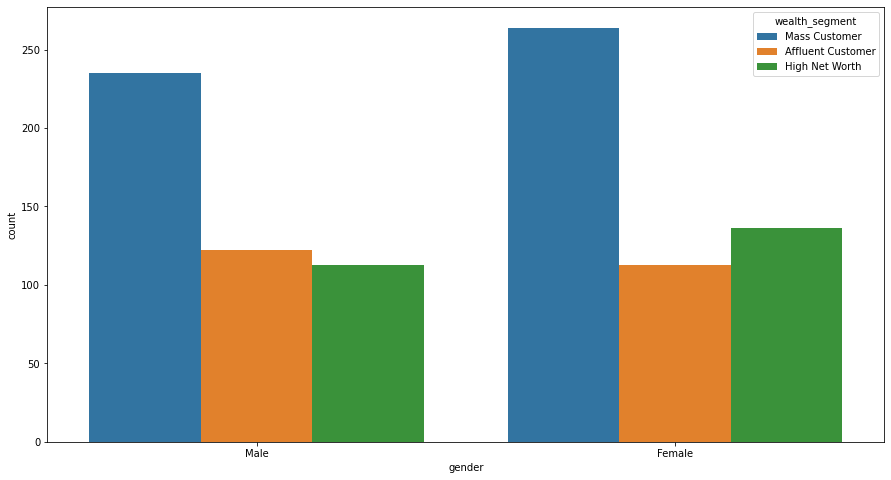

In [171]:
sns.countplot(df_newlist["gender"], hue =df_newlist["wealth_segment"] )

Text(0.5, 1.0, 'Wealth Segment across age group')

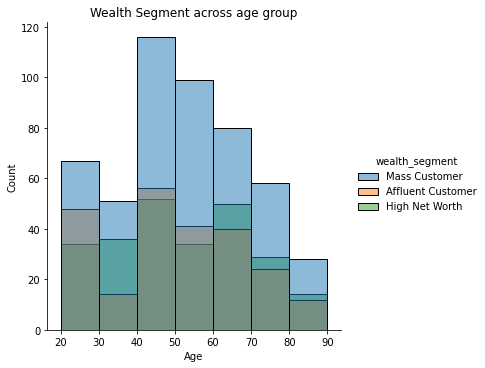

In [174]:
sns.displot(x='Age', binwidth=10, data=df_newlist, hue='wealth_segment')
plt.title('Wealth Segment across age group')

Text(0.5, 1.0, 'Wealth Segment across state')

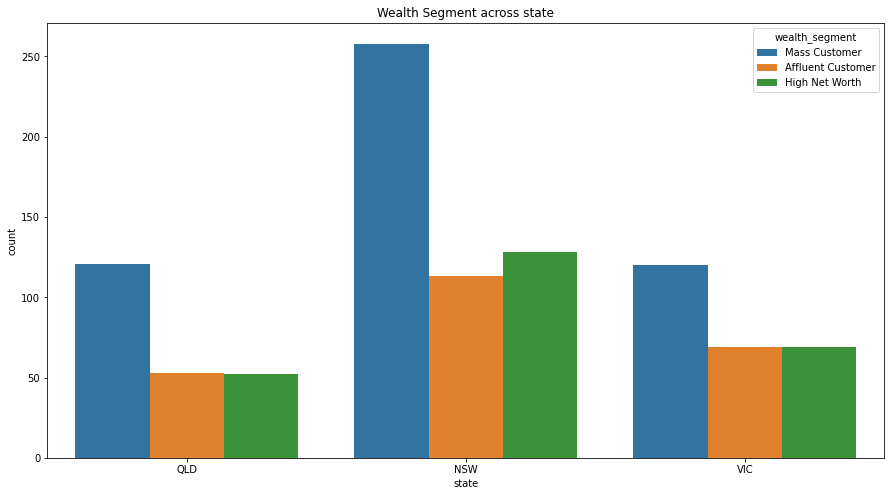

In [176]:
sns.countplot(x='state', data=df_newlist, hue='wealth_segment')
plt.title('Wealth Segment across state')

Text(0.5, 1.0, 'Job industry category across gender')

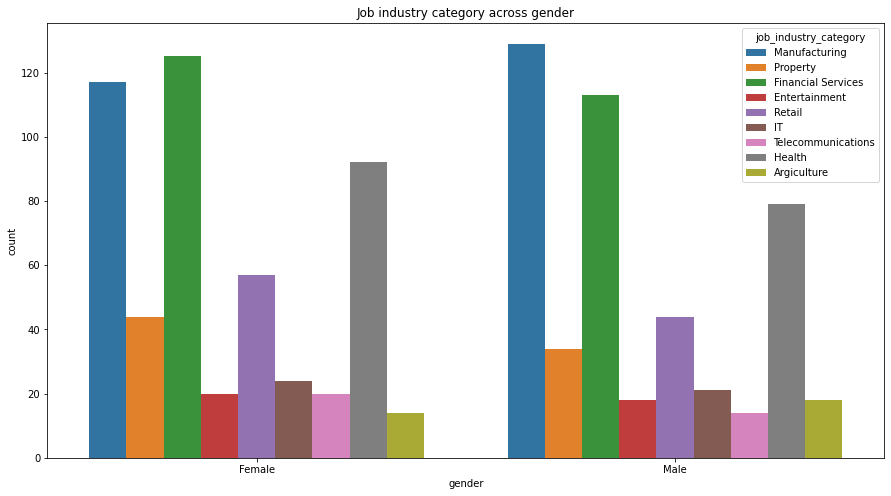

In [178]:
sns.countplot(x='gender', data=df_newlist, hue='job_industry_category', order = df_newlist['gender'].value_counts().index)
plt.title('Job industry category across gender')

Text(0.5, 1.0, 'Number of people of different gender in different state')

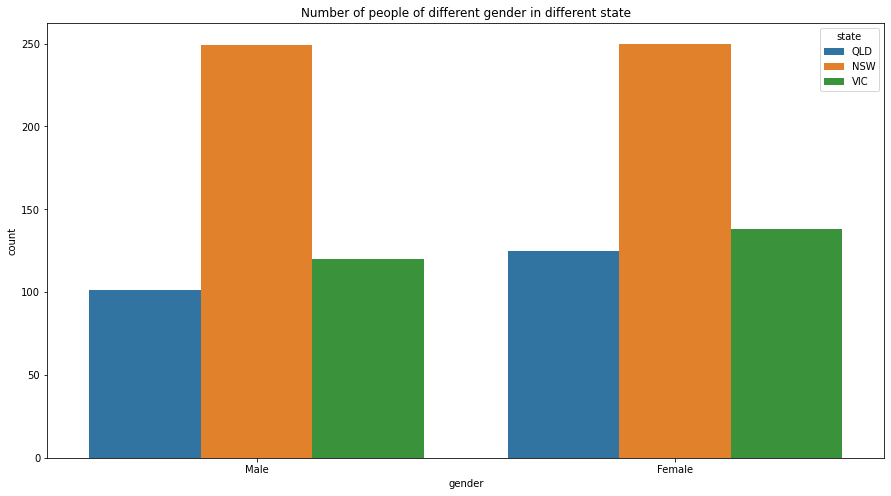

In [179]:
sns.countplot(x='gender', data=df_newlist, hue='state')
plt.title('Number of people of different gender in different state')

Text(0.5, 1.0, 'Number of people in different state')

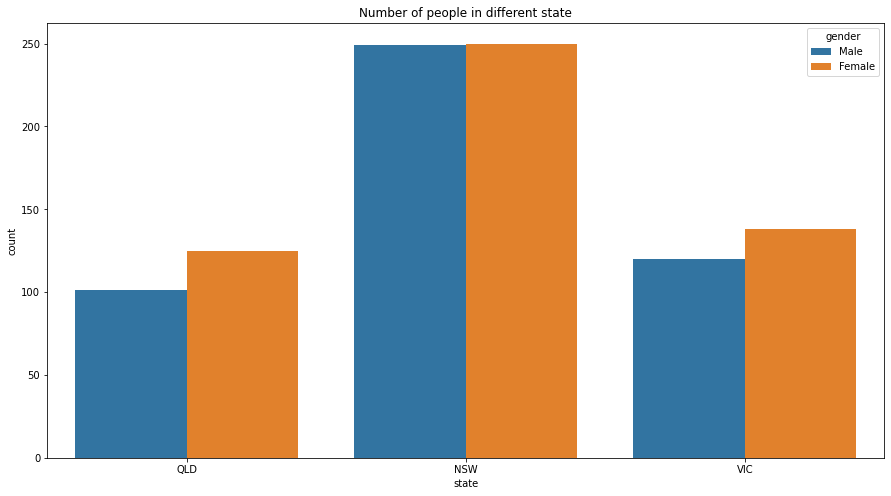

In [180]:
sns.countplot(x = 'state', data = df_newlist, hue = 'gender')
plt.title('Number of people in different state')

Text(0.5, 1.0, 'Boxplot showing the age range of customers')

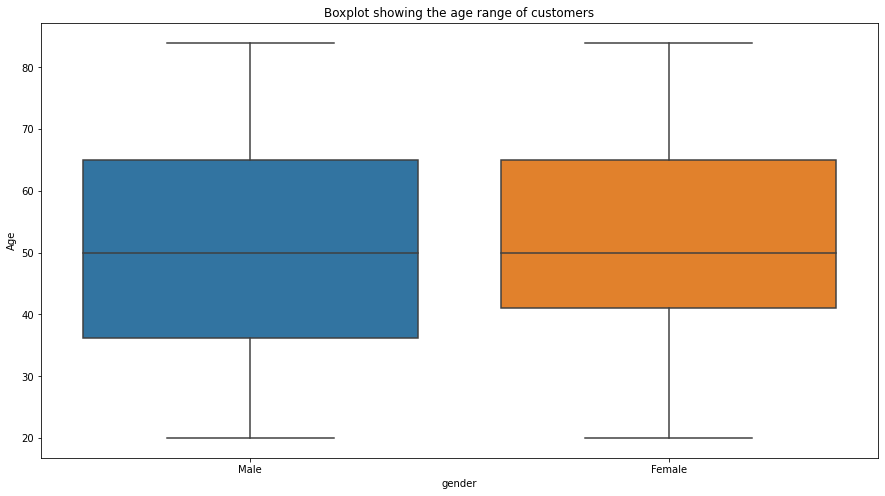

In [181]:
sns.boxplot(x = df_newlist['gender'], y = df_newlist['Age'])
plt.title('Boxplot showing the age range of customers')

In [182]:
#print the final file to excel ready to be used as a data source for dashboard
df.to_excel('D:/KPMG virtual intership/current_customers.xlsx', sheet_name='123', index=False)
df_newlist.to_excel('D:/KPMG virtual intership/target_new_customers.xlsx', sheet_name='4', index=False)